# Gradiente Descendente

O Gradiente Descente tem por objetivo ser uma alternativa eficiente para a minização da função custo $J$. Partindo de valores randômicos para os parâmetros do modelo, o algoritmo calcula o gradiente de $J$ para definir a intensidade e direção da variação a ser aplicada sobre os parâmetros para que iterativamente seja atingido o mínimo local da função custo.

$$\theta = \theta - \alpha \nabla J(\theta)$$
$$\nabla J(\theta) = \begin{bmatrix} \frac{\partial J}{\partial \theta_1} & , &  ... & , & \frac{\partial J}{\partial \theta_n}\end{bmatrix}^T$$

O gradiente, através das derivadas parciais, determina o grau de inclinação da curva em cada uma das direções. Sendo assim, a cada iteração o algoritmo gradiente descendente realiza um decréscimo dos parâmetros do modelo de forma proporcional a inclinação da curva, ou seja, maiores deslocamentos são realizados na direção de maior inclinação. Esta característica é o que permite a adoção de uma taxa de aprendizagem fixa bem como torna o algoritmo eficiente para determinação do mínimo local. A figura abaixo ilustra o processo de otimização da função custo para um modelo univariado.


<img src="imgs/gradient_descent_univariated.png" alt="linear_model" width="400" style="display:block; margin:auto"/>

<div align="center">
Otimização da função custo de um modelo univariado.
</div>

<br>

O parâmetro $\alpha$, denominado de taxa de aprendizagem, é um valor positivo de tal forma que a diminuição do parâmetro $\theta$ conforme o valor do gradiente visa diminuir o parâmetro caso a inclinação seja positiva e aumentar o parâmetro caso a inclinação seja negativa.

A taxa de aprendizado também regula o tamanho do passo na direção do mínimo e deve ser definida de tal forma a garantir que o próximo custo estimado seja sempre menor ou igual ao atual: 

$$J(\theta - \alpha \nabla J(\theta)) \leq J(\theta)$$

A Figura abaixo ilustra como o algoritmo pode divergir e nunca atingir o mínimo local devido a má escolha da taxa de aprendizagem.

<br>
<img src="imgs/learning_rate_choose.png" alt="linear_model" width="600" style="display:block; margin:auto"/>

<div align="center">
Otimização da função custo de um modelo univariado.
</div>

A utilização de uma taxa de aprendizado muito elevada pode fazer com que o passo na direção do mínimo seja grande o suficiente para deslocar os parâmetros até uma região de maior inclinação que resultará em passos cada vez maiores provocando a divergência do algoritmo. 

Em contrapartida, a utilização de uma taxa de aprendizado muito pequena pode necessitar de uma quantidade excessiva de iterações, afinal á medida em que o algoritmo se aproxima do mínimo a inclinação da curva diminui reduzindo cada vez mais o tamanho dos passos.

Posto isto, a escolha da taxa de aprendizado adequada é um problema central dos algoritmos de aprendizado de máquina e está diretamente relacionada as características do problema abordado.

A seguir, a título de exemplo, é ilustrada a utilização do Gradiente Descendente para minimizar a função custo de um problema de regressão linear.

## Gradiente Descendente na Regressão Linear

A função custo do problema de regressão linear é convexa, ou seja, possui somente um mínimo. Posto isto, o algoritmo gradiente descendente surge como uma excelente alternativa para minimização, afinal na regressão linear a ação de determinar o mínimo local equivale a determinar o mínimo global.

A aplicação do gradiente descendente depende primeiramente da definição do gradiente da função custo. Tomando como custo a metade do MSE, temos:

$$J(\theta) = \frac{MSE}{2} = \frac{1}{2 m} \sum\limits_{i=1}^{m}(h_{\theta}(x^{i}) - y^{i})^{2}$$

Aplicando o modelo da regressão linear:

$$J(\theta_1, \theta_2) = \frac{1}{2 m} \sum\limits_{i=1}^{m}(\theta_1 + \theta_2 x^{i} - y^{i})^{2}$$

Calculando o gradiente da função custo como a derivada parcial de cada um dos parâmetros do modelo:

$$ \nabla J(\theta_1,\theta_2) = \begin{bmatrix} \frac{\partial J}{\partial \theta_1} , \frac{\partial J}{\partial \theta_2}\end{bmatrix}^T = \begin{bmatrix} \frac{1}{m} \sum\limits_{i=1}^{m}(\theta_1 + \theta_2 x^{i} - y^{i}) & , & \frac{1}{m} \sum\limits_{i=1}^{m}(\theta_1 + \theta_2 x^{i} - y^{i}) x^{i} \end{bmatrix}^T =  \begin{bmatrix} \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x^{i}) - y^{i}) & , & \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x^{i}) - y^{i}) x^{i} \end{bmatrix}^T $$

A escolha da função custo como metade do MSE visa permitir a simplificação do termo 2 que, devido a derivada parcial, multiplicaria todo o gradiente. A função abaixo implementa o gradiente calculado:


In [1]:
import numpy as np

# linear regression hypothesis: o1 + o2*x
def h(x, o):
    m = len(x)
    input = np.zeros((m, 2))
    input[:,0] = np.ones(m)
    input[:,1] = x[:, 0]
    return np.dot(input, o)

# J = MSE/2
def J(x, o, y):
    m = len(x)
    h_x = h(x, o)
    return np.sum(np.power(h_x - y, 2), axis=0)*1/(2*m)

def dJ(x, o, y):
    m = len(x)
    h_x = h(x, o)
    dJ1 = np.sum(h_x - y)*1/m
    dJ2 = np.sum((h_x - y)*x)*1/m
    return np.array([[dJ1],[dJ2]])

A função abaixo implementa a minimização dos parâmetros do modelo através do algoritmo gradiente descendente e retorna: os parâmetros que minimizam a função, todos os parâmetros testados e a quantidade de iterações necessárias para atingir o mínimo local da função.

In [2]:
def gradient_descent(x, o, y, alpha, min_grad, max_iterations):
    i = 0
    o_hist = o
    grad = dJ(x, o, y)
    while np.linalg.norm(grad) > min_grad and i < max_iterations:
        o = o - alpha*grad
        o_hist = np.c_[o_hist, o] # append column

        grad = dJ(x, o, y)
        i += 1
        
    return [o, o_hist, i]

A condição de parada do algoritmo esta vinculada a obtenção do mínimo local, caso em que o módulo do gradiente da função custo se aproxima de zero. Entretanto, é comum em algoritmos de otimização também prever uma quantidade máxima de iterações com o objetivo de previnir laços infinitos em caso de divergência.

A função a seguir plota o resultado da comparação do modelo obtido com os dados de treinamento.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_comparison_to_training(x, min_o, y):
    h_x = h(x, min_o)
    
    plt.figure(figsize=(20,10))
    plt.plot(x, y, '*')
    plt.plot(x, h_x)
    plt.legend(['y', 'h_x = ' +  str(round(min_o[0,0],2)) + ' + ' + str(round(min_o[1,0],2)) + '*x'])

O Script abaixo define um conjunto de treinamento arbitrário para a função $y$ e através de um ponto de partida aleatório executa o algoritmo gradiente descendente para minimizar os parâmetros do modelo.

iterations: 307


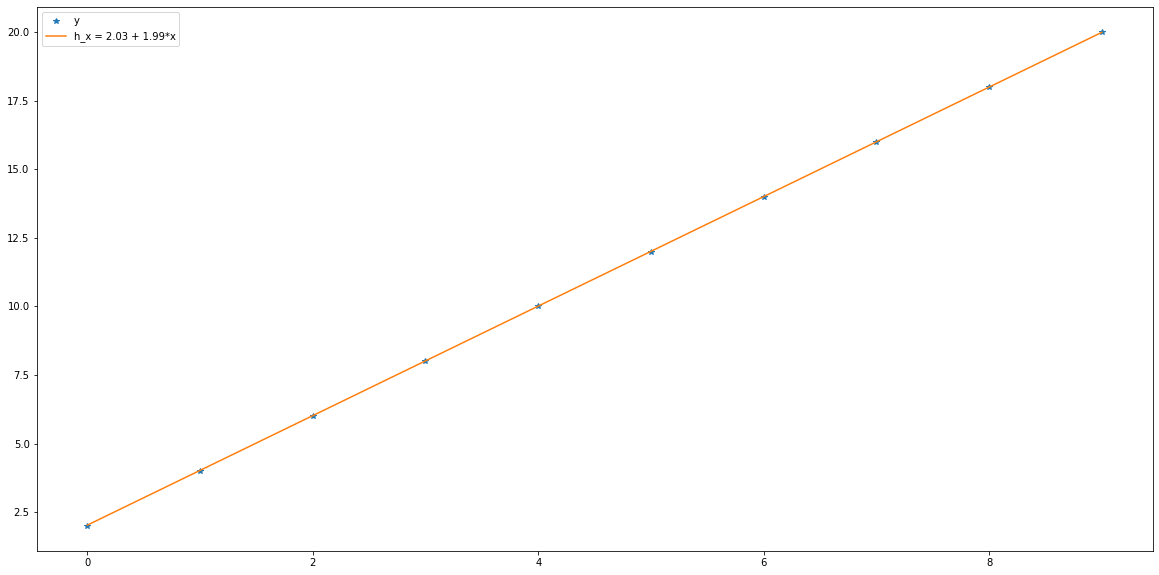

In [28]:
# config gradient descent
max_iterations = 10000
alpha = 6e-2   # high learning rate
# alpha = 1.5e-2   # good learning rate
# alpha = 1e-3   # low learning rate
min_grad = 1.0e-2

# define training data
x = np.arange(0, 10, 1)
m = len(x)
x = np.reshape(x, [m, 1])
y = 2 + 2*x 

# execute gradient descent to minimize o
o_start = [[10],[10]] # arbitrary start
[min_o, o_hist_gd, iterations] = gradient_descent(x, o_start, y, alpha, min_grad, max_iterations)

# plot result
print('iterations:', iterations)
plot_comparison_to_training(x, min_o , y)

Pela variação do parâmetro min_grad é possível constatar a existência de um tradeoff. Afinal quanto menor definimos min_grad mais o modelo estimado se aproxima da função real. Entretanto, a diminuição de min_grad também implica em uma maior quantidade de iterações refletindo o aumento de custo computacional do algoritmo.

A função abaixo mostra os deslocamentos realizados pelo gradiente descendente sobre os parâmetros do modelo em conjunto com a superfície e as curvas de nível que representam a variação da função custo.

In [29]:
def plot_route(x, o_hist, y):
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    # arbitrary data to visualize cost function
    o1 = np.arange(-10, 10, 0.25)
    o2 = np.arange(-10, 10, 0.25)

    # prepare data in meshgrid format
    X, Y = np.meshgrid(o1, o2)
    
    # serialize meshgrid to use J
    c_o = np.power(len(o1), 2)
    o = np.zeros((2, c_o))
    o[0, :] = np.reshape(X, [1, c_o])
    o[1, :] = np.reshape(Y, [1, c_o])
    j = J(x, o, y)

    # transform j to meshgrid
    Z = np.reshape(j, np.shape(X))
    
    # get gradient descent route
    j = J(x, o_hist, y)
        
    # plot
    fig = plt.figure(figsize=(20,10))
    # surface
    ax = fig.add_subplot(121, projection='3d')
    ax.set_xlabel(r'$\theta_{1}$')
    ax.set_ylabel(r'$\theta_{2}$')
    
    ax.plot_surface(X, Y, Z, alpha=0.2)
    ax.plot(o_hist[0,:], o_hist[1,:], j, linestyle='--', marker='o')
    
    # plot contours    
    ax = fig.add_subplot(122)
    levels = [10, 50, 100, 250, 500, 750, 1000] # to improve view 
    contours = ax.contour(X, Y, Z, levels, colors='black')
    ax.plot(o_hist[0,:], o_hist[1,:], '*')

    plt.clabel(contours, inline = True, fontsize = 10)
    plt.xlabel(r'$\theta_{1}$')
    plt.ylabel(r'$\theta_{2}$')

As figuras abaixo ilustram a minimização dos parâmetros do modelo partindo do ponto arbitrário $(10,10)$. A escolha deste ponto visa mostrar que mesmo a distância entre a posição inicial e o mínimo local da função sendo igual para ambos os parâmetros, os deslocamentos maiores são realizados na direção de $\theta_2$. Esta característica se deve ao fato da inclinação na direção de $\theta_2$ ser muito superior a inclinação na direção de $\theta_1$, ou seja, uma variação de $\theta_2$ impacta mais no custo se comparada a uma variação de $\theta_1$.

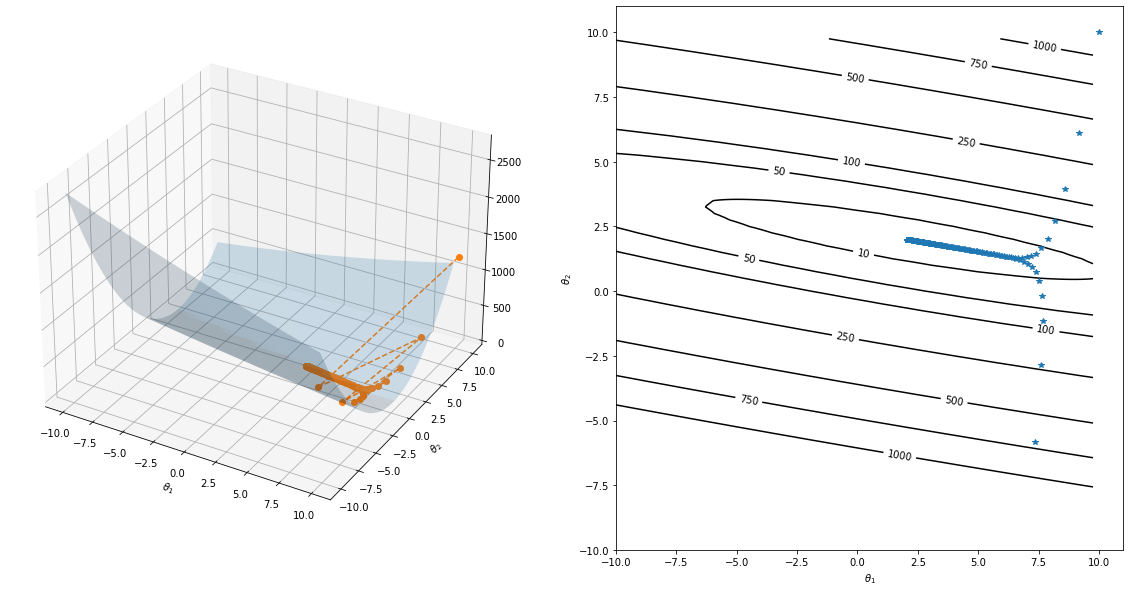

In [30]:
plot_route(x, o_hist_gd, y)

As funções abaixo mostram uma animação que representa o processo de ajuste da linha do modelo aos dados do treinamento através do algoritmo gradiente descendente.

In [31]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

global anim 
def animate(j, line, o_hist):
    global anim 

    h_x = h(x, o_hist[:, j])

    line.set_data((x, h_x))
    plt.legend(['y', 'iter: ' + str(j) + ', equ: ' + str(round(o_hist[0,j],2)) + ' + (' + str(round(o_hist[1,j], 2)) + '*x)'])
    
    return line,
    
def show_animation(x, o_hist, y):
    global anim 
    
    fig, ax = plt.subplots(figsize=(12,6))
    line, = ax.plot([])     # A tuple unpacking to unpack the only plot

    plt.plot(x, y, '*', label='y')
    anim = FuncAnimation(fig, animate, repeat = False, frames=np.shape(o_hist)[1], blit=True, fargs=(line, o_hist), interval=1)
    plt.show()

<IPython.core.display.Javascript object>


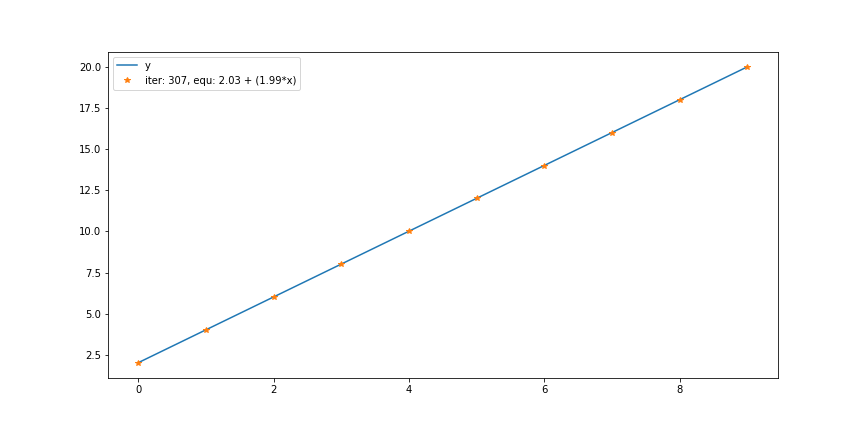

In [32]:
show_animation(x, o_hist_gd, y)

Apesar de possuir um tempo de convergência 10x superior a abordagem randômica do capítulo anterior, a estratégia apresentada até então ainda necessita de uma quantidade elevada de iterações para determinar o mínimo local da função. Sendo assim, com o objetivo de propor alternativas ainda mais eficientes, diversas variações do gradiente descendente foram propostos pela literatura. A seguir seus principais expoentes são empregados para minimização da função custo do problema de regressão linear proposto.

## Momentum

Esta variação do Algoritmo do Gradiente Descendente inclui o conceito de impulso no processo de otimização. A cada iteração uma fração do deslocamento anterior, definido pelo parâmetro $\gamma$, é adicionado a estimativa de deslocamento atual. Como consequência o processo de convergência é acelerado visto que o módulo dos deslocamentos é aumentado à medida em que as iterações ocorrem.

$$ v = \gamma v + \alpha \nabla J(\theta)$$

$$\theta = \theta - v$$

A função abaixo implementa o algoritmo.

In [9]:
def momentum(x, o, y, alpha, gamma, min_grad, max_iterations):
    i = 0
    o_hist = o
    grad = dJ(x, o, y)
    v = 0
    while np.linalg.norm(grad) > min_grad and i < max_iterations:
        v = gamma*v + alpha*grad
        o = o - v
        o_hist = np.c_[o_hist, o] # append column

        grad = dJ(x, o, y)
        i += 1
        
    return [o, o_hist, i]

O script a seguir mostra o processo de minimização da função custo através do algoritmo momentum para um parâmetro $\gamma$ arbitrário.

iterations: 161


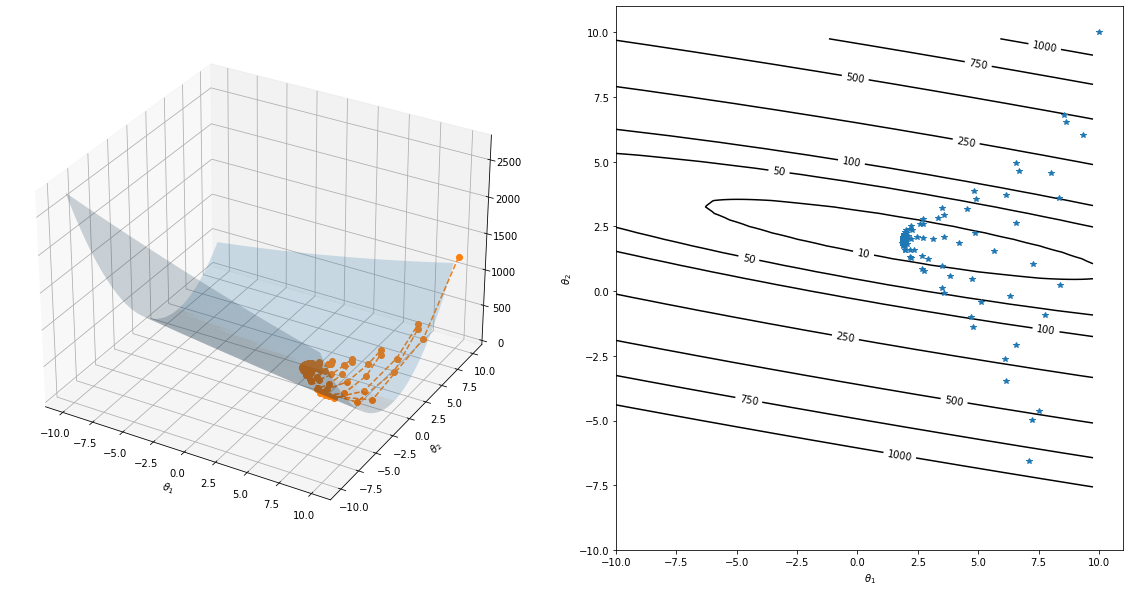

In [10]:
gamma = 0.9
[min_o, o_hist_momentum, iterations] = momentum(x, o_start, y, alpha, gamma, min_grad, max_iterations)
print('iterations:', iterations)
plot_route(x, o_hist_momentum, y)

É possível verificar que, devido ao impulso acumulado, o algoritmo momentum atinge o mínimo local com 10x menos iterações que o gradiente descendente original. Entretanto, este impulso também faz com que o algoritmo mantenha deslocamentos elevados mesmo ao se aproximar do mínimo local, como consequência são realizadas diversas iterações em torno do ponto mínimo até que o impulso acumulado seja dissipado.

## RMSProp

A cada iteração do algoritmo Root Mean Square Propagations (RMSProp) o fator de aprendizado é ponderado pela média móvel quadrática dos gradientes calculados nas iterações anteriores. Com a divisão do gradiente no ponto pela média quadrática o algoritmo tem por objetivo priorizar a exploração das direções menos exploradas da curva, visto que deslocamentos maiores são realizados nas direções em que a média acumulada dos gradientes é menor. Novamente o termo $\gamma$ define quanto do passado influenciará a estimativa atual, já o termo $\epsilon$ é um termo de suavização da ordem de $10^{-8}$, que tem por finalidade prevenir divisões por zero.


$$v = \gamma v + (1 - \gamma) \nabla J(\theta)^{2}$$

$$\theta = \theta - \alpha \frac{\nabla J(\theta)}{\sqrt[]{v + \epsilon}}$$

A função abaixo implementa o algoritmo.

In [11]:
def RMSprop(x, o, y, alpha, gamma, eps, min_grad, max_iterations):
    i = 0
    o_hist = o
    grad = dJ(x, o, y)
    v = 0
    while np.linalg.norm(grad) > min_grad and i < max_iterations:
        v = gamma*v + (1 - gamma)*grad**2
        o = o - alpha*grad/np.sqrt(v + eps)
        o_hist = np.c_[o_hist, o] # append column

        grad = dJ(x, o, y)
        i += 1
        
    return [o, o_hist, i]

O script a seguir mostra o processo de minimização da função custo através do algoritmo RMSprop para parâmetros $\gamma$ e $\epsilon$ arbitrários.

iterations: 585


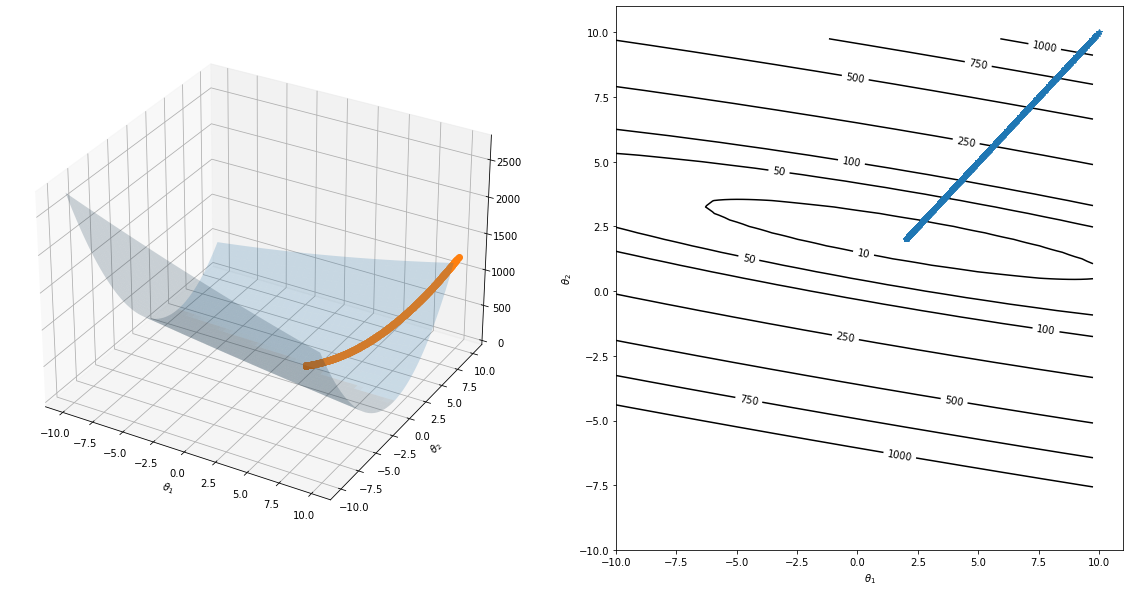

In [12]:
gamma = 0.9
eps = 10**-8
[min_o, o_hist_RMSprop, iterations] = RMSprop(x, o_start, y, alpha, gamma, eps, min_grad, max_iterations)
print('iterations:', iterations)
plot_route(x, o_hist_RMSprop, y)

A estratégia de média quadrática utilizada pelo RMSprop torna mais suave o caminho até o mínimo local da função custo, porém também menos eficiente visto que necessitou de aproximadamente 5x mais iterações que o algoritmo momentum.

## Adam

O Adaptive Moment Estimation (Adam) é algoritmo mais utilizado pela literatura para otimização de funções custo em algoritmos de aprendizado de máquina, assim como o RMSProp se vale da média móvel quadrática, armazenada na variável $v$, para priorizar a exploração de determinadas áreas da curva e assim como o Momentum também utiliza o impulso, armazenado na variável $m$, para ponderar a taxa de aprendizado. Enfim, os termos $\beta_{1}$ e $\beta_{2}$ controlam qual fração das estimativas anteriores são consideradas na estimativa atual de $m$ e $v$, respectivamente.

$$m = \beta_{1} m + (1 - \beta_{1}) \nabla J(\theta)$$

$$v = \beta_{2} m + (1 - \beta_{2}) \nabla J(\theta)^{2}$$

$$\bar{m} = \frac{m}{1 - \beta_{1}}, \bar{v} = \frac{v}{1 - \beta_{2}}$$

$$\theta = \theta - \alpha \frac{\bar{m}}{\sqrt[]{\bar{v} + \epsilon}}$$

A função abaixo implementa o algoritmo.

In [13]:
def Adam(x, o, y, alpha, beta_1, beta_2, eps, min_grad, max_iterations):
    i = 0
    o_hist = o
    grad = dJ(x, o, y)
    v = m = 0
    while np.linalg.norm(grad) > min_grad and i < max_iterations:
        m = beta_1 * m + (1 - beta_1) * grad
        v = beta_2 * v + (1 - beta_2) * (grad**2)
        mhat = m / (1 - beta_1)
        vhat = v / (1 - beta_2)
        o = o - alpha*mhat/np.sqrt(vhat + eps)
        o_hist = np.c_[o_hist, o] # append column

        grad = dJ(x, o, y)
        i += 1
        
    return [o, o_hist, i]

O script a seguir mostra o processo de minimização da função custo através do algoritmo Adam para parâmetro $\beta_{1}$ e $\beta_{2}$ arbitrários.

iterations: 272


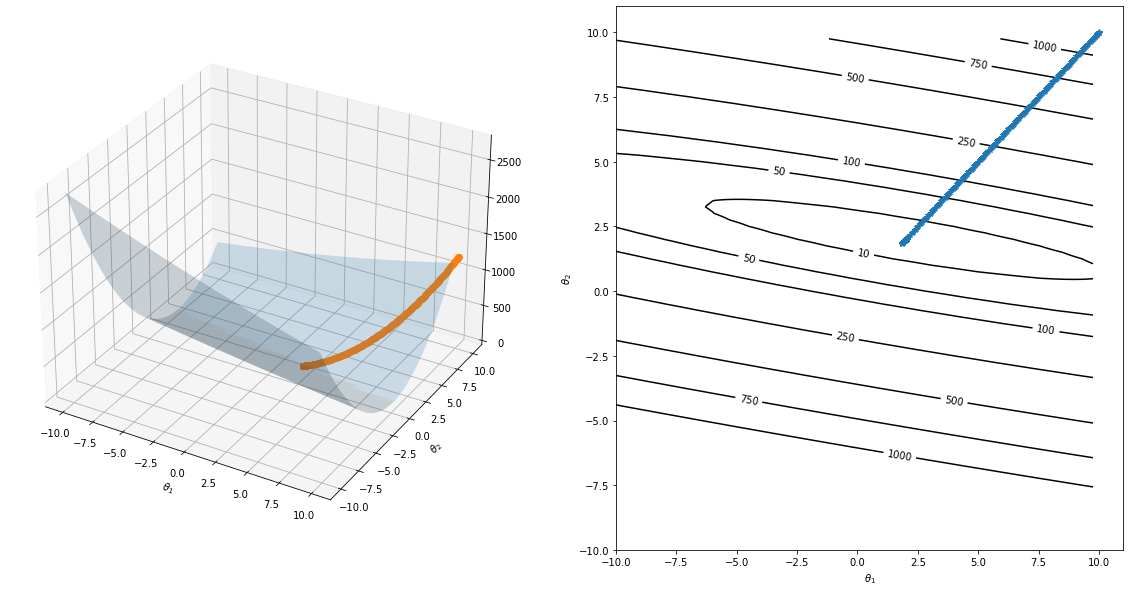

In [14]:
beta_1 = 0.7
beta_2 = 0.2
[min_o, o_hist_adam, iterations] = Adam(x, o_start, y, alpha, beta_1, beta_2, eps, min_grad, max_iterations)
print('iterations:', iterations)
plot_route(x, o_hist_adam, y)

A utilização da média aritmética como forma de ponderar a taxa de aprendizado faz com que o algoritmo possua uma perfomance melhor do que o RMSprop. Entretanto, a utilização do conceito de momento assim como em seu predecessor faz com que seja necessária uma quantidade maior de iterações para que o impulso seja atenuado. 

O script abaixo compara os algoritmos apresentados em função da quantidade de iterações necessárias para atingir o mínimo local da função.

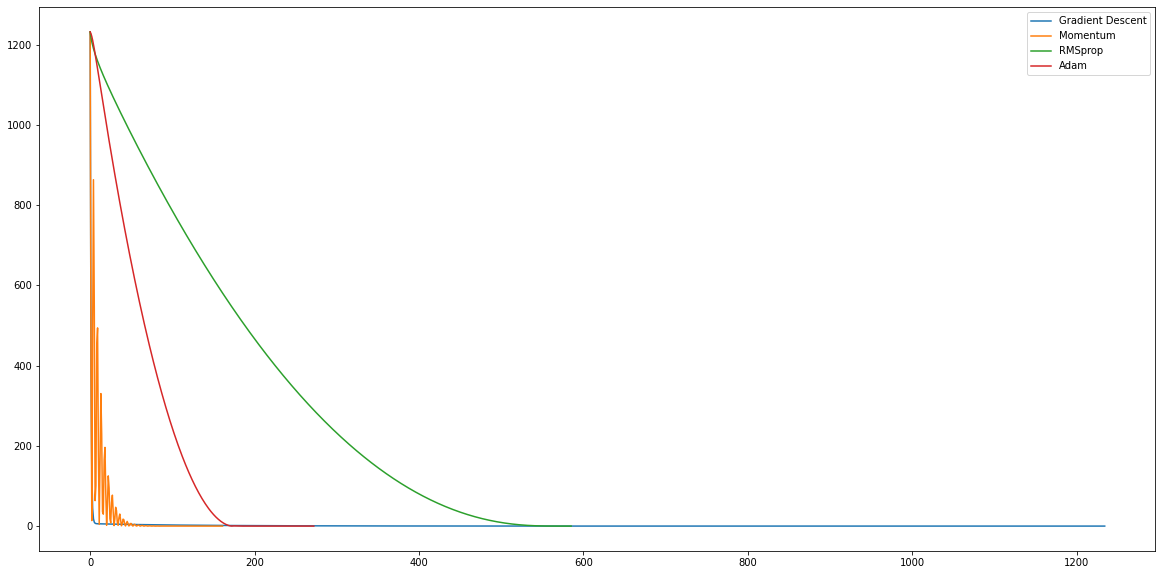

In [15]:
j_gd       = J(x, o_hist_gd, y)
j_momentum = J(x, o_hist_momentum, y)
j_RMSprop  = J(x, o_hist_RMSprop, y)
j_adam     = J(x, o_hist_adam, y)
fig = plt.figure(figsize=(20,10))
plt.plot(j_gd)
plt.plot(j_momentum)
plt.plot(j_RMSprop)
plt.plot(j_adam)
plt.legend(['Gradient Descent', 'Momentum', 'RMSprop', 'Adam'])

Conforme já verificado o algoritmo momentum apresenta uma melhor perfomance para a minimização da função custo de um problema de regressão linear. Entretanto, a literatura indica o Adam como o algoritmo mais utilizado na soluções de aprendizado de máquina. A seção a seguir visa esclarecer esta discordância.

## Gradiente Descendente para Funções Não Convexas 

O problema de minimização se mostra bem mais complexo para funções não convexas, ou seja, que possuem mútiplos mínimos locais. Para este tipo de função, conforme ilustrado pela figura abaixo, a escolha do ponto de partida é crucial para a determinação do mínimo. 

<img src="imgs/non_convex_optimization.png" alt="linear_model" width="500" style="display:block; margin:auto"/>

<div align="center">
Otimização de uma função não convexa.
</div>

<br>

Os algoritmos anteriormente apresentados foram propostos no contexto deste tipo de problema, ou seja, possuem o objetivo de aumentar as chances do gradiente descendente determinar o mínimo global da função. A figura abaixo ilustra uma comparação entre os processos de otimização dos algoritmos gradiente descendente (ciano) e momentum (magenta) para uma função com dois mínimos locais. 

<img src="imgs/momentum_vs_gd.gif" alt="linear_model" width="500" style="display:block; margin:auto"/>

<div align="center">
Momentum (ciano) x Gradiente Descendene (Magenta).
</div>

<br>

Verifica-se na animação acima, que devido ao impulso acumulado, o algoritmo momentum atinge o mínimo global da função enquanto o gradiente descendente encerra sua busca ao se deparar com o primeiro mínimo local encontrado. Enfim, a animação abaixo mostra o comportamento dos algoritmos quando existe um obstáculo entre o ponto inicial e o mínimo global da função.

<img src="imgs/optimizers_comparison.gif" alt="linear_model" width="500" style="display:block; margin:auto"/>

<div align="center">
Comparação entre as Variações do Gradiente Descendente.
</div>

<br>

Pela inspeção da figura acima é possível verificar que somente o algoritmo Adam conseguiu atingir o mínimo global. Isto se deve ao fato do algoritmo combinar as estratégias dos algoritmos Momentum atingindo, devido ao impulso acumulado, uma posição além do primeiro mínimo local e RMSprop que após atingir essa posição prioriza a exploração da direção menos explorada, neste caso a direção do mínimo global.

Enfim, a escolha do algoritmo Adam pela literatura não se dá pela sua eficiência, mas sim pela sua capacidade de determinar o mínimo global mesmo para funções com múltiplos mínimos locais.

## Considerações Finais

A escolha de qual método de otimização utilizar é diretamente dependente do problema abordado, ou seja, não existe uma solução pré-estabelecida e sim uma abordagem mais indicada para cada classe de problemas. Nesta seção foi mostrado que o algoritmo Momentum é mais eficiente no contexto dos problemas de regressão linear que possuem somente um mínimo. Entretanto, também foi mostrado que para funções não convexas o algoritmo Adam representa uma alternativa mais robusta visto que aumenta as chances do algoritmo atingir o mínimo global da função.

Os algoritmos desenvolvidos neste capítulo podem ser obtidos em [src/gradient_descent.py](src/gradient_descent.py). 

As animações que ilustram a minização de funções não convexas com os algoritmos discutidos foram geradas com a ferramenta de código aberto presente neste [Repositório do Github](https://github.com/lilipads/gradient_descent_viz).